In [1]:
#tool box
import pandas as pd
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt

#stylin
plt.style.use('seaborn-darkgrid')

#import the data
pd.read_excel('complete_carb_system_ex.xlsx')
data=pd.read_excel('complete_carb_system_ex.xlsx')


/Users/oliviawren/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


# IDK where I got this data from lmao wtf olivia...

In [2]:
#convert all units to µM/L
tmp_data=[]
for i,d in data.iterrows():
    if d['DIC_units']=='mg C/L':
        tmp_data.append((d['DIC']/12.011)*1000)
    else:
        tmp_data.append(np.nan)
        
tmp_data=np.array(tmp_data)
data['DIC_trans']=tmp_data.astype(float)

In [3]:
HCO3_data=[]
for i,d in data.iterrows():
    if d['HCO3_units']=='µM/L':
        HCO3_data.append(d['HCO3'])
    elif d['HCO3_units']=='mM/L':
        HCO3_data.append(d['HCO3']*1000)
    elif d['HCO3_units']=='mg/L':
        HCO3_data.append(d['HCO3']/61.0168)
    else:
        HCO3_data.append(np.nan)
HCO3_data=np.array(HCO3_data)
data['HCO3_trans']=HCO3_data.astype(float)
# print(data['HCO3_trans'])

In [4]:
Alk_data=[]
for i,d in data.iterrows():
    if d['Alk_units']=='mM/L':
        Alk_data.append(d['Alk']*1000)
    elif d['Alk_units']=='mM/kg':
        Alk_data.append(d['Alk']*1000)
    elif d['Alk_units']=='meq/L':
        Alk_data.append(d['Alk']*1000)
    elif d['Alk_units']=='µM/L':
        Alk_data.append(d['Alk'])
    elif d['Alk_units']=='M/kg':
        Alk_data.append(d['Alk'])
    elif d['Alk_units']=='µeq/L':
        Alk_data.append(d['Alk'])
    else:
        Alk_data.append(np.nan)
        
Alk_data=np.array(Alk_data)
data['Alk_trans']=Alk_data.astype(float)

In [5]:
#converting pCO2 units to uatm
pCO2_data=[]
for i,d in data.iterrows():
    if d['CO2_units']=='µatm':
        pCO2_data.append(d['CO2'])
    elif d['CO2_units']=='log(pCO2)':
        pCO2_data.append((10**(d['CO2']))*1000)
    elif d['CO2_units']=='log(pCO2)(mbar)':
        pCO2_data.append(((10**(d['CO2']))*0.000986923)*1000)
    elif d['CO2_units']=='mbar':
        pCO2_data.append((d['CO2']*0.000986923)*1000)
    elif d['CO2_units']=='Pa':
        pCO2_data.append((d['CO2']*9.8692300004935e-6)*1000)
    else:
        pCO2_data.append(np.nan)
        
pCO2_data=np.array(pCO2_data)
data['pCO2_trans']=pCO2_data.astype(float)

In [6]:
import numpy as np
import pandas as pd
import xarray
from matplotlib import pyplot as plt

In [7]:
# define input conditions; DIC and Alk
kwargs = dict(
    par1 = data['pCO2_trans'],
    par1_type = 4, 
    par2 = data['DIC_trans'],
    par2_type = 2,
    salinity=0
)
print("Conditions have been defined!")

Conditions have been defined!


In [8]:
# Import PyCO2SYS
import PyCO2SYS as pyco2

# Run PyCO2SYS
results = pyco2.sys(**kwargs)

# Extract and print out the results
# print(results['pH'])
# print(np.array(data['pH']))

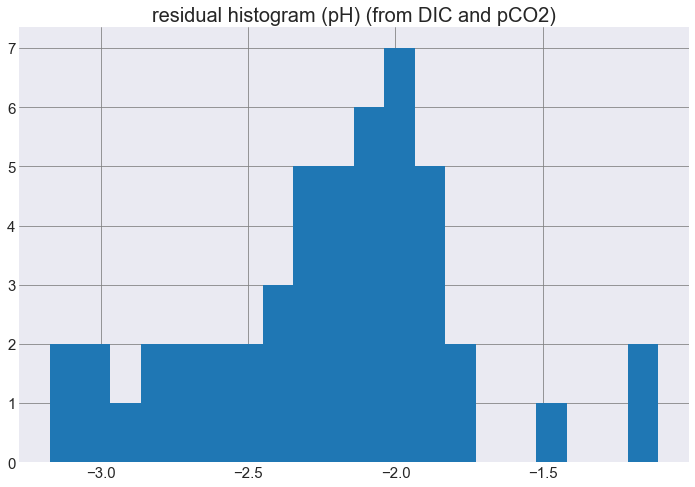

In [9]:
#residual for ph_pred
r_ph = data['pH'] - results['pH']

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
plt.hist(r_ph,bins=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.ylabel('',fontsize=18)
plt.title('residual histogram (pH) (from DIC and pCO2)', fontsize=20)
plt.grid(color='grey')


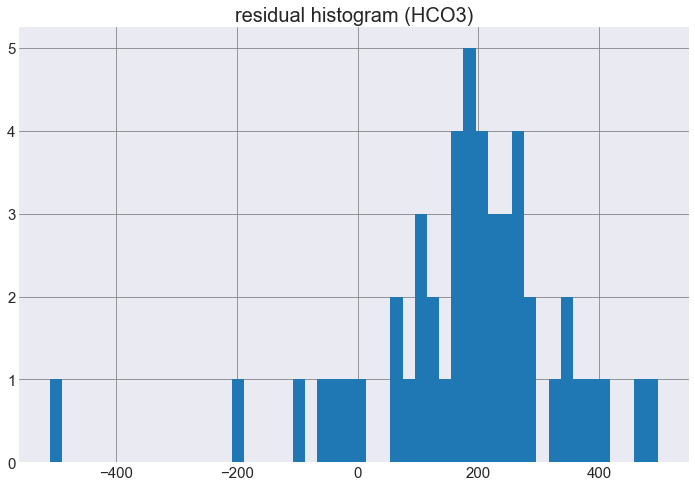

In [10]:
#residual for HCO3_pred
r_HCO3 = data['HCO3'] - results['carbonate']

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
plt.hist(r_HCO3,bins=50)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('residual histogram (HCO3)', fontsize=20)
plt.grid(color='grey')

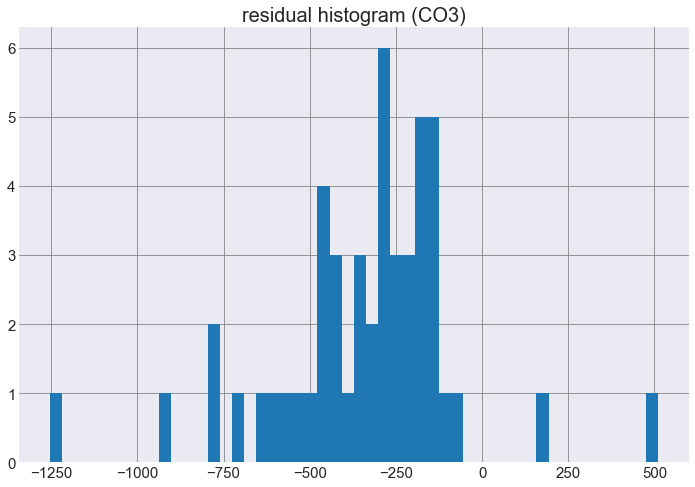

In [11]:
#residual for CO3_pred
r_CO3 = data['CO3'] - results['bicarbonate']

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
plt.hist(r_CO3,bins=50)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('residual histogram (CO3)', fontsize=20)
plt.grid(color='grey')

In [189]:
# define input conditions; DIC and HCO3
kwargs2 = dict(
    par1 = data['HCO3_trans'],
    par1_type = 6, 
    par2 = data['DIC_trans'],
    par2_type = 2,
    salinity=0
)
print("Conditions round 2 have been defined!")

Conditions round 2 have been defined!


In [190]:
# Import PyCO2SYS
import PyCO2SYS as pyco2

# Run PyCO2SYS
results2 = pyco2.sys(**kwargs2)

# Extract and print out the results
print(results['pH'])
print(results2['pH'])

[ 9.76393765  9.78238549  9.67643942 10.09699791  9.84024701  9.90947828
  9.94615826  9.75043235  9.54270297  9.79537099  9.40669305 10.03952024
  9.02637909  9.88180365  9.5357629   9.85333199  9.55619324  9.18701262
 10.02509689  9.59623253  9.35810034  9.53062787  9.72947022 10.21422373
         nan         nan 10.48280054 10.02964922  9.56568857  9.91248853
  9.64005751 11.05585857  9.6739605  10.03971743  9.90552711  9.50285487
  9.30612831  9.87706534  9.17071629 10.03947221  9.35413759  8.99664381
  9.03285337  8.99489483  8.93367784  8.99074272  9.28393201  9.16378268
  9.49412291  9.01855257  9.82761432]
[10.48931905 10.40898082 10.33242036 10.64796348 10.6164477  10.67235351
 10.68016265 10.52345923 10.07328161 10.46098471  9.82116598 10.63580023
  9.05458301 10.63652309 10.15435323 10.54798454 10.03003912  9.22831594
 10.67641502 10.22891943  9.76528299 10.08416731 10.48444193 10.60188725
         nan         nan 10.01946738 10.66752454 10.02746655 10.64389793
 10.28584524 

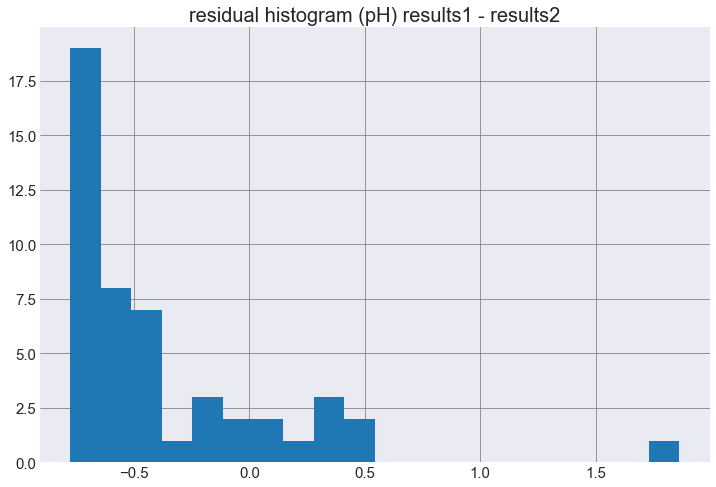

In [191]:
#residual for ph_pred
r_ph2 = results['pH'] - results2['pH']

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
plt.hist(r_ph2,bins=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.ylabel('',fontsize=18)
plt.title('residual histogram (pH) results1 - results2', fontsize=20)
plt.grid(color='grey')


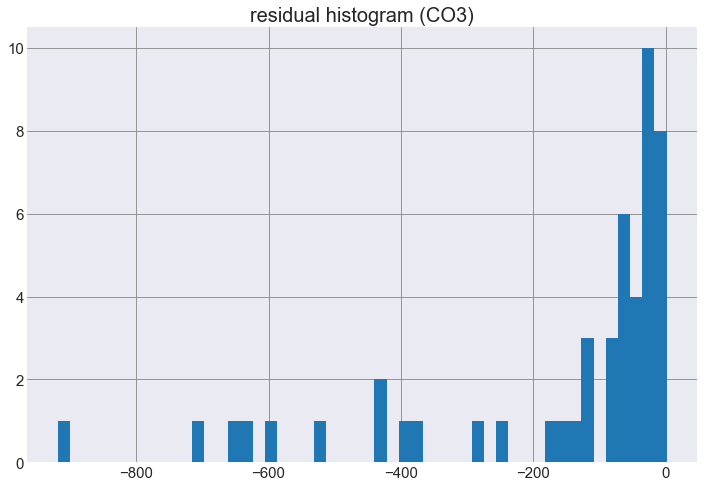

In [192]:
#residual for CO3_pred
r_CO32 = data['CO3'] - results2['bicarbonate']

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
plt.hist(r_CO32,bins=50)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('residual histogram (CO3)', fontsize=20)
plt.grid(color='grey')

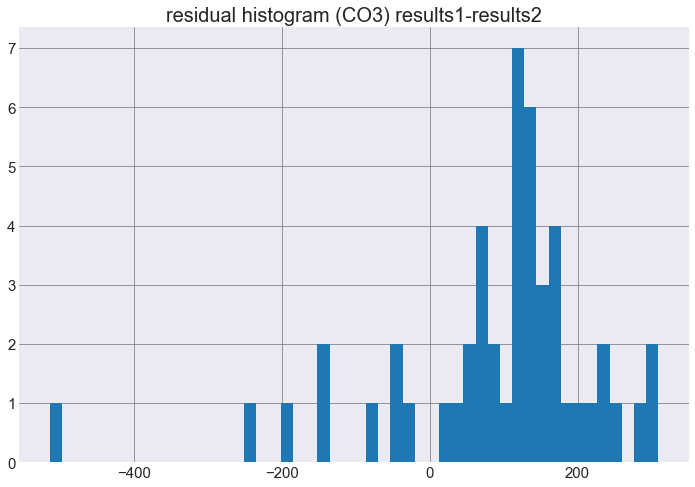

In [193]:
#residual for CO3_pred
r_CO3_3 = results['bicarbonate'] - results2['bicarbonate']

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
plt.hist(r_CO3_3,bins=50)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('residual histogram (CO3) results1-results2', fontsize=20)
plt.grid(color='grey')

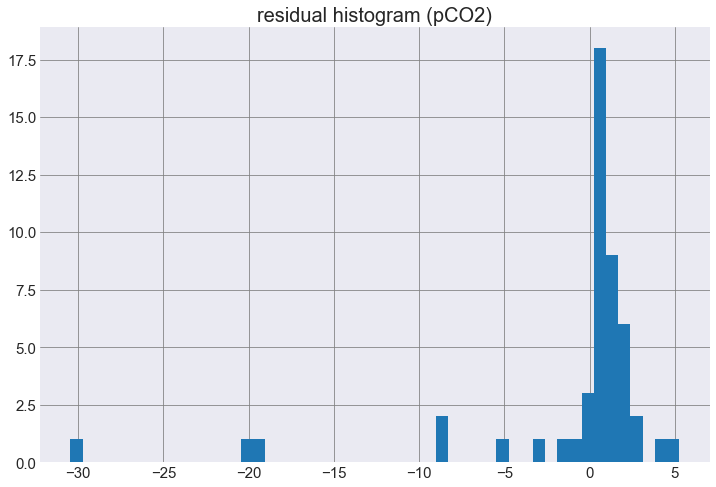

In [194]:
#residual for pCO2
r_pCO2 = data['pCO2_trans'] - results2['pCO2']

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
plt.hist(r_pCO2,bins=50)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('residual histogram (pCO2)', fontsize=20)
plt.grid(color='grey')

In [195]:
# define input conditions; pH and HCO3
kwargs3 = dict(
    par1 = data['HCO3_trans'],
    par1_type = 6, 
    par2 = data['pH'],
    par2_type = 3,
    salinity=0
)
print("Conditions round 3 have been defined!")

Conditions round 3 have been defined!


In [204]:
# Import PyCO2SYS
import PyCO2SYS as pyco2

# Run PyCO2SYS
results3 = pyco2.sys(**kwargs3)
# print(np.array(data['pCO2_trans']))
# print(results3['pCO2'])

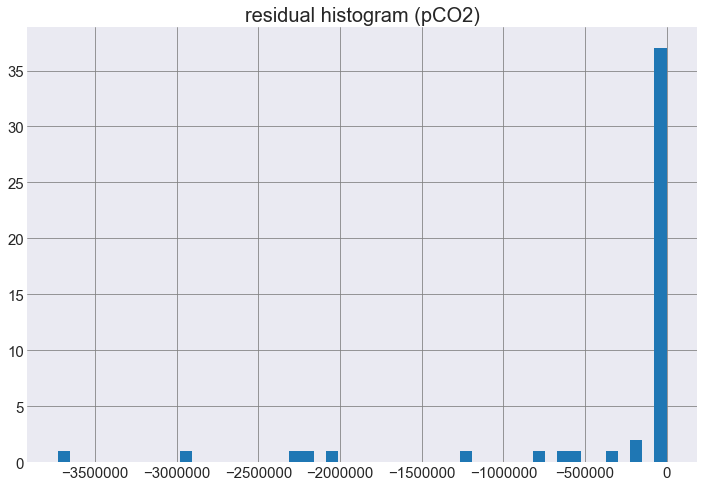

In [210]:
#residual for pCO2
r_pCO2_2 = data['pCO2_trans'] - results3['pCO2']

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
plt.hist(r_pCO2_2,bins=50)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('residual histogram (pCO2)', fontsize=20)
plt.grid(color='grey')

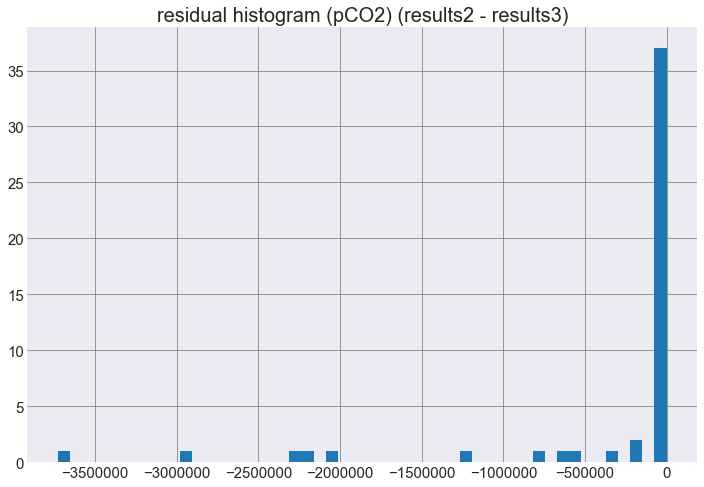

In [206]:
#residual for pCO2
r_pCO2_3 = results2['pCO2'] - results3['pCO2']

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
plt.hist(r_pCO2_3,bins=50)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('residual histogram (pCO2) (results2 - results3)', fontsize=20)
plt.grid(color='grey')

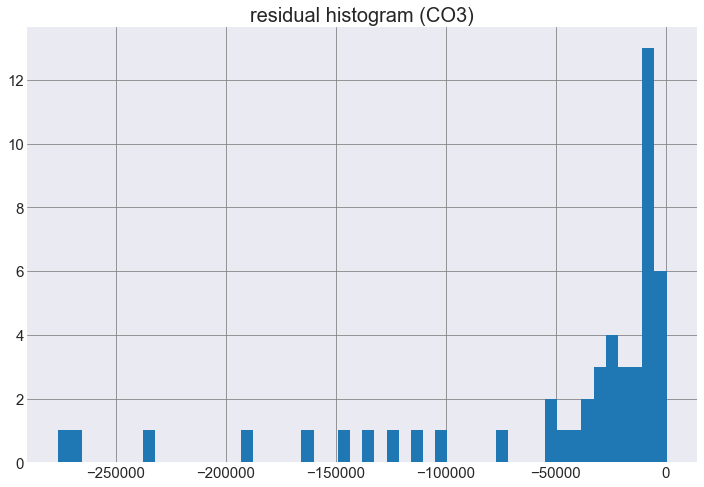

In [212]:
#residual for CO3_pred
r_CO3_4 = data['CO3'] - results3['bicarbonate']

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
plt.hist(r_CO3_4,bins=50)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('residual histogram (CO3)', fontsize=20)
plt.grid(color='grey')